# Análise Exploratória dos Dados


### Levando em consideração a abordagem utilizada pelo ano de 2016, irei replicar a mesma abordagem para os anos de 2017, 2018 e 2019. Logo, Tratarei os dados desses anos e concatenarei em um único dataframe para realizar a análise exploratória dos dados.

### Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### Garantindo que o diretório de trabalho está correto

In [2]:
base_dir = os.path.dirname(os.path.abspath('__file__'))
dir_files_path = os.path.join(base_dir, '../data/raw/')
reports_file_path = os.path.join(base_dir, '../reports/general_reports')

## Dataframes

#### Após ler o dicionário de dados, percebi que estas 3 bases são as mais relevantes para o estudo.

#### 2016

In [3]:
licitacoes_2016 = pd.read_csv(f'{dir_files_path}2016.csv/licitacao.csv')
lotes_2016 = pd.read_csv(f'{dir_files_path}2016.csv/lote.csv')
itens_2016 = pd.read_csv(f'{dir_files_path}2016.csv/item.csv')

#### 2017

In [4]:
licitacoes_2017 = pd.read_csv(f'{dir_files_path}2017.csv/licitacao.csv')
lotes_2017 = pd.read_csv(f'{dir_files_path}2017.csv/lote.csv')
itens_2017 = pd.read_csv(f'{dir_files_path}2017.csv/item.csv')

#### 2018

In [5]:
licitacoes_2018 = pd.read_csv(f'{dir_files_path}2018.csv/licitacao.csv')
lotes_2018 = pd.read_csv(f'{dir_files_path}2018.csv/lote.csv')
itens_2018 = pd.read_csv(f'{dir_files_path}2018.csv/item.csv')

#### 2019

In [6]:
licitacoes_2019 = pd.read_csv(f'{dir_files_path}2019.csv/licitacao.csv')
lotes_2019 = pd.read_csv(f'{dir_files_path}2019.csv/lote.csv')
itens_2019 = pd.read_csv(f'{dir_files_path}2019.csv/item.csv')

### Concatenando os dataframes

In [7]:
licitacoes = pd.concat([licitacoes_2016, licitacoes_2017, licitacoes_2018, licitacoes_2019])

In [8]:
licitacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237011 entries, 0 to 70545
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CD_ORGAO                     237011 non-null  int64  
 1   NM_ORGAO                     237011 non-null  object 
 2   NR_LICITACAO                 237011 non-null  float64
 3   ANO_LICITACAO                237011 non-null  int64  
 4   CD_TIPO_MODALIDADE           237011 non-null  object 
 5   NR_COMISSAO                  153245 non-null  float64
 6   ANO_COMISSAO                 153245 non-null  float64
 7   TP_COMISSAO                  153245 non-null  object 
 8   NR_PROCESSO                  236858 non-null  object 
 9   ANO_PROCESSO                 236857 non-null  float64
 10  TP_OBJETO                    237011 non-null  object 
 11  CD_TIPO_FASE_ATUAL           237011 non-null  object 
 12  TP_LICITACAO                 237011 non-null  object 
 13  

In [9]:
licitacoes.isna().sum()

CD_ORGAO                   0
NM_ORGAO                   0
NR_LICITACAO               0
ANO_LICITACAO              0
CD_TIPO_MODALIDADE         0
                       ...  
BL_GERA_DESPESA            0
DS_OBSERVACAO         228133
PC_TX_ESTIMADA        236913
PC_TX_HOMOLOGADA      236936
BL_COMPARTILHADA           0
Length: 61, dtype: int64

### tratando a coluna VL_HOMOLOGADO, pois estava como string ao invés de float

In [10]:
licitacoes['VL_HOMOLOGADO'] = pd.to_numeric(licitacoes['VL_HOMOLOGADO'], errors= 'coerce')

In [11]:
licitacoes['VL_HOMOLOGADO'] = licitacoes['VL_HOMOLOGADO'].fillna(0)

In [12]:
licitacoes['VL_HOMOLOGADO'] = licitacoes['VL_HOMOLOGADO'].astype('float64')

In [13]:
# Substituindo os valores nulos por 0 para os campos numéricos
licitacoes[licitacoes.select_dtypes(include = ['float64', 'int64']).columns] = licitacoes[licitacoes.select_dtypes(include = ['float64', 'int64']).columns].fillna(0)

In [14]:
# Substituindo os valores nulos por 'Não Informado' para os campos categóricos
licitacoes[licitacoes.select_dtypes(include = ['object']).columns] = licitacoes[licitacoes.select_dtypes(include = ['object']).columns].fillna('Não Informado')

In [15]:
# Verificando se ainda existem valores nulos
licitacoes.isna().sum()

CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
                     ..
BL_GERA_DESPESA       0
DS_OBSERVACAO         0
PC_TX_ESTIMADA        0
PC_TX_HOMOLOGADA      0
BL_COMPARTILHADA      0
Length: 61, dtype: int64

In [16]:
report_licitacoes = sv.analyze(licitacoes.drop(columns=['NR_DOCUMENTO_FORNECEDOR', 'NR_DOCUMENTO_VENCEDOR']))

report_licitacoes.show_html(f'{reports_file_path}/report_licitacoes_geral.html', layout='vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report c:\Users\joaop\DataspellProjects\EDA_state_spedings\notebooks\../reports/general_reports/report_licitacoes_geral.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Agora, para a base de itens, irei dividir elas em amostras de 15% do valor total de cada ano, para que a análise exploratória e análise de texto não demorem muito tempo.

In [17]:
from my_library import sample_df

itens_2016_sample = sample_df(itens_2016, 0.15)
itens_2017_sample = sample_df(itens_2017, 0.15)
itens_2018_sample = sample_df(itens_2018, 0.15)
itens_2019_sample = sample_df(itens_2019, 0.15)

itens = pd.concat([itens_2016_sample, itens_2017_sample, itens_2018_sample, itens_2019_sample])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
itens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480112 entries, 47942 to 815105
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CD_ORGAO                        480112 non-null  int64  
 1   NR_LICITACAO                    480112 non-null  float64
 2   ANO_LICITACAO                   480112 non-null  int64  
 3   CD_TIPO_MODALIDADE              480112 non-null  object 
 4   NR_LOTE                         480112 non-null  int64  
 5   NR_ITEM                         480112 non-null  int64  
 6   NR_ITEM_ORIGINAL                480112 non-null  object 
 7   DS_ITEM                         480112 non-null  object 
 8   QT_ITENS                        480112 non-null  object 
 9   SG_UNIDADE_MEDIDA               480112 non-null  object 
 10  VL_UNITARIO_ESTIMADO            468591 non-null  float64
 11  VL_TOTAL_ESTIMADO               468591 non-null  float64
 12  DT_REF_VALOR

### Tratando a coluna VL_TOTAL_HOMOLOGADO, pois novamente estava como string ao invés de float

In [19]:
itens[['QT_ITENS', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO']].isna().sum()

QT_ITENS                      0
VL_UNITARIO_HOMOLOGADO    96580
VL_TOTAL_HOMOLOGADO       96580
dtype: int64

In [20]:
# Tratando os possíveis problemas de formatação dos valores
itens['VL_TOTAL_HOMOLOGADO'] = itens['VL_TOTAL_HOMOLOGADO'].str.replace('.', '')
itens['QT_ITENS','VL_TOTAL_HOMOLOGADO'] = itens['VL_TOTAL_HOMOLOGADO'].str.replace('R$', '')

itens['QT_ITENS'] = itens['QT_ITENS'].str.replace('.', '')
itens['QT_ITENS'] = itens['QT_ITENS'].str.replace('R$', '')

In [21]:
# Convertendo para float
itens['VL_TOTAL_HOMOLOGADO'] = pd.to_numeric(itens['VL_TOTAL_HOMOLOGADO'], errors= 'coerce')

itens['QT_ITENS'] = pd.to_numeric(itens['QT_ITENS'], errors= 'coerce')

In [22]:
# Substituindo os valores nulos por 0
itens[['QT_ITENS', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO']] = itens[['QT_ITENS', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO']].fillna(0)

In [23]:
# Checando se ainda existem valores nulos
itens[['QT_ITENS', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO']].isna().sum()

QT_ITENS                  0
VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
dtype: int64

In [24]:
# convertendo para float
itens[['QT_ITENS','VL_TOTAL_HOMOLOGADO']] = itens[['QT_ITENS','VL_TOTAL_HOMOLOGADO']].astype('float64')

### Agora, faremos o mesmo tratamento de dados para o preenchimento dos valores nulos.

In [25]:
# Substituindo os valores nulos por 0 para os campos numéricos
itens[itens.select_dtypes(include = ['float64', 'int64']).columns] = itens[itens.select_dtypes(include = ['float64', 'int64']).columns].fillna(0)

In [26]:
# Substituindo os valores nulos por 'Não Informado' para os campos categóricos
itens[itens.select_dtypes(include = ['object']).columns] = itens[itens.select_dtypes(include = ['object']).columns].fillna('Não Informado')

In [27]:
# Verificando se ainda existem valores nulos
itens.isna().sum()

CD_ORGAO                           0
NR_LICITACAO                       0
ANO_LICITACAO                      0
CD_TIPO_MODALIDADE                 0
NR_LOTE                            0
NR_ITEM                            0
NR_ITEM_ORIGINAL                   0
DS_ITEM                            0
QT_ITENS                           0
SG_UNIDADE_MEDIDA                  0
VL_UNITARIO_ESTIMADO               0
VL_TOTAL_ESTIMADO                  0
DT_REF_VALOR_ESTIMADO              0
PC_BDI_ESTIMADO                    0
PC_ENCARGOS_SOCIAIS_ESTIMADO       0
CD_FONTE_REFERENCIA                0
DS_FONTE_REFERENCIA                0
TP_RESULTADO_ITEM                  0
VL_UNITARIO_HOMOLOGADO             0
VL_TOTAL_HOMOLOGADO                0
PC_BDI_HOMOLOGADO                  0
PC_ENCARGOS_SOCIAIS_HOMOLOGADO     0
TP_ORCAMENTO                       0
CD_TIPO_FAMILIA                    0
CD_TIPO_SUBFAMILIA                 0
TP_DOCUMENTO                       0
NR_DOCUMENTO                       0
T

In [28]:
report_itens = sv.analyze(itens.drop(columns=['NR_DOCUMENTO', 'NR_DOCUMENTO.1']))
report_itens.show_html(f'{reports_file_path}/report_itens_geral.html', layout='vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report c:\Users\joaop\DataspellProjects\EDA_state_spedings\notebooks\../reports/general_reports/report_itens_geral.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Por meio dos reports, é possível fazer um diagnóstico inicial dos dataframes e identificar possíveis respostas para as perguntas de negócio. Como por exemplo:
<ul>
<li>Distribuição de frequência das variáveis categóricas</li>
<li>Valores mais frequentes</li>
<li>Relação de incerteza entre as features. Ou seja, o quanto uma coluna pode dar de informação sobre a outra</li>
</ul>

## Agora, iremos começar pelas bases recomendadas e depois tentar relacionar com as demais com o objetivo de adquirir mais informações e por fim responder às perguntas de negócio.

In [29]:
filtro = licitacoes['TP_OBJETO'].str.match('com', case = False)

licitacoes_compras = licitacoes[filtro]
licitacoes_compras['DS_OBJETO'].value_counts()

...                                                                                                                                                                                                                                                                                                                                                                                            312
Material                                                                                                                                                                                                                                                                                                                                                                                       189
AQUISIÇÃO DE MEDICAMENTOS                                                                                                                                                                                                         

#### É possível observar que a maioria das descrições de liciatação contém a palavra "aquisição" e sinonimos para se referir a compra de bens. Logo, desenvolvi uma função utilizando NLTK para identificar os substantivos e, assim, identificar maiores relações entre os dados.

##### A fim de realizar tal análise, é necessário preparar os dados. Para isso, seguirei as seguintes etapas:

<li>Normalização: consiste em transformar todas as palavras em minúsculas</li>
<li>Remoção de espaços em branco: consiste em remover os espaços em branco desnecessários</li>
<li>Remoção de stopwords: consiste em remover as palavras que não agregam valor ao texto, como artigos, preposições, etc.</li>

In [30]:
# normalizando os dados

from my_library import preprocess_text_pipeline

licitacoes_compras['DS_OBJETO'] = licitacoes_compras['DS_OBJETO'].apply(lambda x: preprocess_text_pipeline(x))

In [32]:
# agora, iremos criar uma lista com todas as palavras e contar a frequência de cada uma

from my_library import get_most_common_nouns

nouns_and_counts = get_most_common_nouns(licitacoes_compras, 'DS_OBJETO', 100)

In [33]:
nouns_and_counts

[('aquisição', 43285),
 ('registro', 10688),
 ('secretaria', 9883),
 ('material', 9514),
 ('preços', 8969),
 ('materiais', 8914),
 ('saúde', 6916),
 ('conforme', 6877),
 ('município', 6063),
 ('gêneros', 5268),
 ('equipamentos', 5053),
 ('manutenção', 4978),
 ('contratação', 4632),
 ('fornecimento', 4528),
 ('agricultura', 3678),
 ('veículo', 3362),
 ('medicamentos', 3336),
 ('peças', 3334),
 ('anexo', 3183),
 ('municipais', 2971),
 ('empresa', 2948),
 ('educação', 2807),
 ('secretarias', 2597),
 ('objeto', 2399),
 ('i', 2312),
 ('ensino', 2304),
 ('presente', 2291),
 ('escolar', 2277),
 ('limpeza', 2264),
 ('veículos', 2254),
 ('ano', 2207),
 ('especificações', 2092),
 ('licitação', 2038),
 ('escolas', 2026),
 ('edital', 2012),
 ('preço', 1990),
 ('pneus', 1980),
 ('serviços', 1887),
 ('expediente', 1879),
 ('pública', 1868),
 ('atender', 1818),
 ('alimentícios', 1789),
 ('alimentação', 1769),
 ('mg', 1767),
 ('construção', 1765),
 ('necessidades', 1753),
 ('pregão', 1676),
 ('merenda

Por meio dos dados apresentados, decidi seguir a seguinte abordagem:
<ol>
<li>Elencar palavras-chave pelos radicais de forma que agrupem os termos mais relevantes</li>
<li>Plottarei distribuições com o objetivo de verificar a diferença de valores</li>
<li>Usar esses radicais como filtro para analisar distribuições de frequências mais específicas </li>

A seguir, agruparei as palavras-chave por radicais e plotarei as distribuições
<ul>
<li>material</li>
<li>secretaria</li>
<li>alimentos</li>
<li>municipal</li>
<li>saúde</li>

In [34]:
# cria um dicionario que agrupa por radical e soma a conta
root_nouns = ['mater', 'secret', 'aliment', 'municip', 'saúde', 'equip', "veículo" ]

# talvez eu poderia ter feito de maneira mais performática, mas não consegui pensar em outra forma
grouped_nouns_and_counts = {}
for noun, count in nouns_and_counts:
    for root in root_nouns:
        if noun.startswith(root):
            if root in grouped_nouns_and_counts:
                grouped_nouns_and_counts[root] += count
            else:
                grouped_nouns_and_counts[root] = count

# tentei desenvolver uma função para plotar as distribuições a partir dos radicais, mas não consegui fazer funcionar
# from my_library import plot_boxplot_for_stems
# plot_boxplot_for_stems(nouns_and_counts, root_nouns_to_include)

In [35]:
grouped_nouns_and_counts

{'secret': 12480,
 'mater': 18428,
 'saúde': 6916,
 'equip': 5053,
 'veículo': 5616,
 'municip': 4317,
 'aliment': 3558}

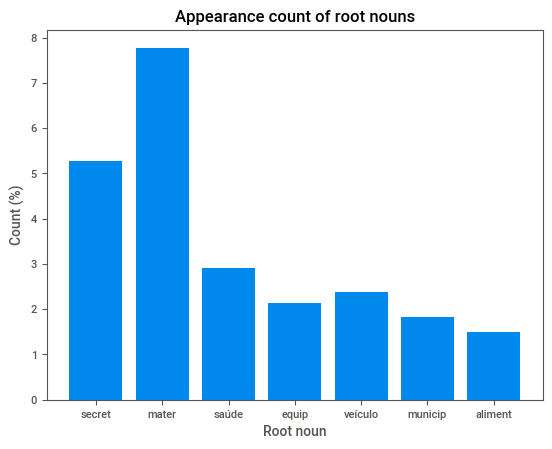

In [36]:
# Bar plot das distribuições baseadas no tamanho da coluna de descrições

df_column_size = len(licitacoes['DS_OBJETO'])
labels = list(grouped_nouns_and_counts.keys())
values = [(v / df_column_size) * 100 for v in grouped_nouns_and_counts.values()]

fig, ax = plt.subplots()
ax.bar(labels, values)

# Add the title and labels
ax.set_title("Appearance count of root nouns")
ax.set_xlabel("Root noun")
ax.set_ylabel("Count (%)")

# Show the plot
plt.show()

In [37]:
sum(grouped_nouns_and_counts.values())/df_column_size

0.23782862398791618

#### levando em consideração os resultados apresentados, percebe-se que essas palavras-chave ocupam aproximadamente 24% do total de descrições de licitações. Logo, é possível afirmar que seria preciso mais palavras chaves para atingir o resultado obtido com a análise de substantivos para o ano isolado. A seguir, irei analisar as distribuições de frequências dessas palavras-chave.

##### material

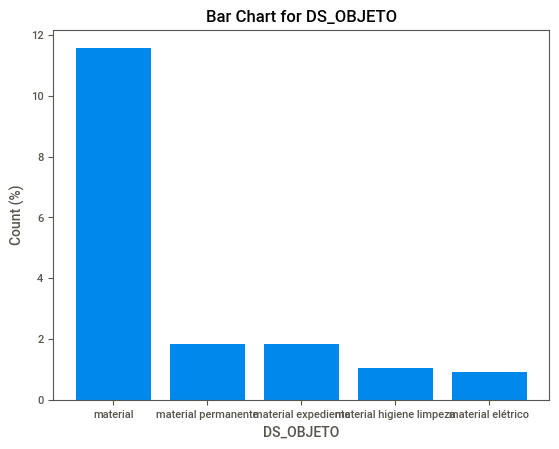

In [38]:
from my_library import plot_bar_chart_for_filtered_df

filtro = licitacoes_compras['DS_OBJETO'].str.match('mater', case = False)
plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

##### Pelos nomes estão impossíveis de ler, então vou deixar a legenda logo abaixo. Percebe-se também que a maioria dos valores estão concentrados em torno de 0, o que indica que elas podem estar englobadas na descrição "materiais"

In [39]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

material                                                                            191
material permanente                                                                  30
material expediente                                                                  30
material higiene limpeza                                                             17
material elétrico                                                                    15
                                                                                   ... 
material manutenção veículo onix placa ixp 0710 chassi 9bgkl48vobh163856 - saúde      1
material porta estação ( rodoviaria )                                                 1
materiais canalização água loteamento industrial                                      1
material manutenção adequações alojamento professores escola neuza brizola            1
materiais copa cozinha centros referencia assistencia social - cras .                 1
Name: DS_OBJETO, Length: 1159, d

##### secretaria

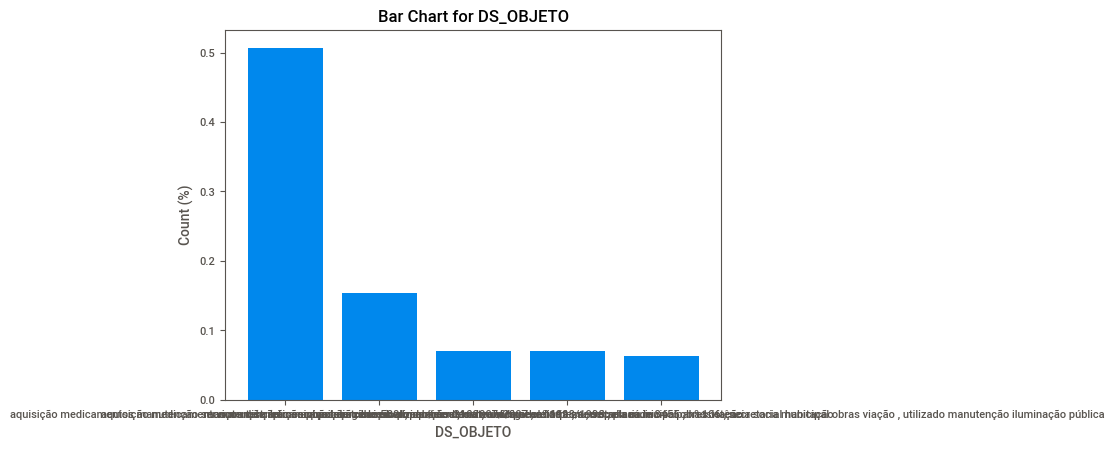

In [40]:
# secretaria
filtro = licitacoes_compras['DS_OBJETO'].str.contains('secret')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [41]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde                                                                         73
aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde .                                                                       22
manutenção retroescavadeira case 580l , ano/modelo 2007/2007 , nº 111 , secretaria municipal obras viação                                                                         10
aquisição gêneros alimentícios , material higiene limpeza , secretaria municipal assistência social habitação                                                                     10
manutenção caminhão mercedes-benz sprinter 310d , ano/modelo 1998/1998 , placa iir 8455 , nº 106 , secretaria municipal obras viação , utilizado manutenção iluminação pública     9
                                                                                               

##### alimentos

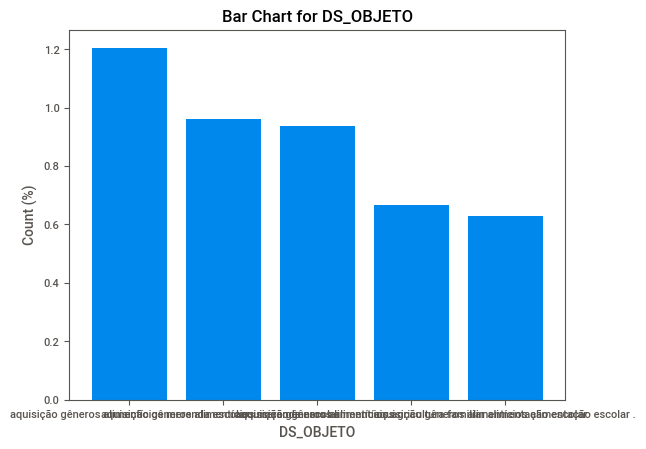

In [42]:
# alimentos
filtro = licitacoes_compras['DS_OBJETO'].str.contains('aliment')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [43]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição gêneros alimentícios merenda escolar                                                                                                                                                                                                                                                                                               94
aquisição gêneros alimentícios merenda escolar .                                                                                                                                                                                                                                                                                             75
aquisição gêneros alimentícios                                                                                                                                                                                                                                                                                                          

##### municipal

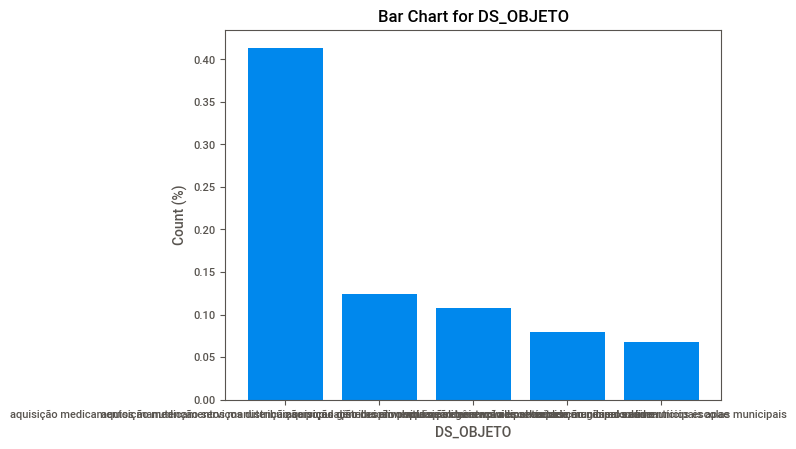

In [44]:
# municipal
filtro = licitacoes_compras['DS_OBJETO'].str.contains('municip')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [45]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde                                                                                  73
aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde .                                                                                22
aquisição gêneros alimentícios alimentação escolas rede municipal ensino .                                                                                                                 19
aquisição gêneros alimentícios merenda escolas municipais apae                                                                                                                             14
aquisição gêneros alimentícios escolas municipais                                                                                                                                          12
                                                  

##### saúde

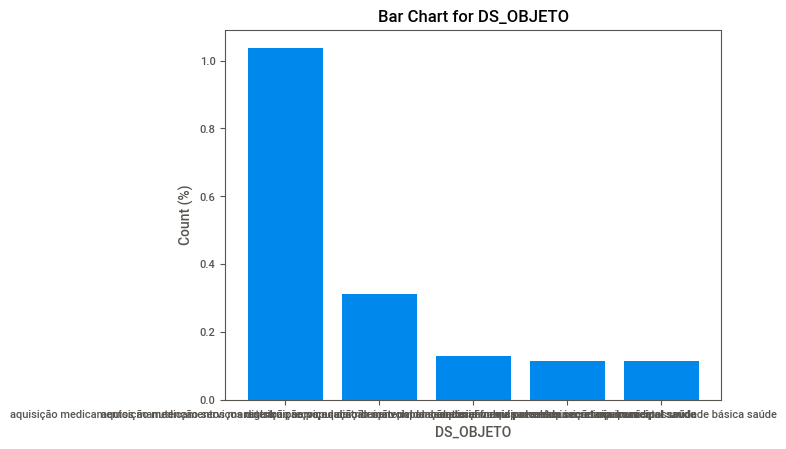

In [46]:
# saúde
filtro = licitacoes_compras['DS_OBJETO'].str.contains('saúde')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [47]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde                                                                                                                                                         73
aquisição medicamentos manutenção serviços distribuição população desenvolvida secretaria municipal saúde .                                                                                                                                                       22
registro preços aquisição material ambulatorial forma parcelada secretaria municipal saúde .                                                                                                                                                                       9
aquisição equipamentos secretaria municipal saúde                                                                                                                                                                        

##### equipamentos

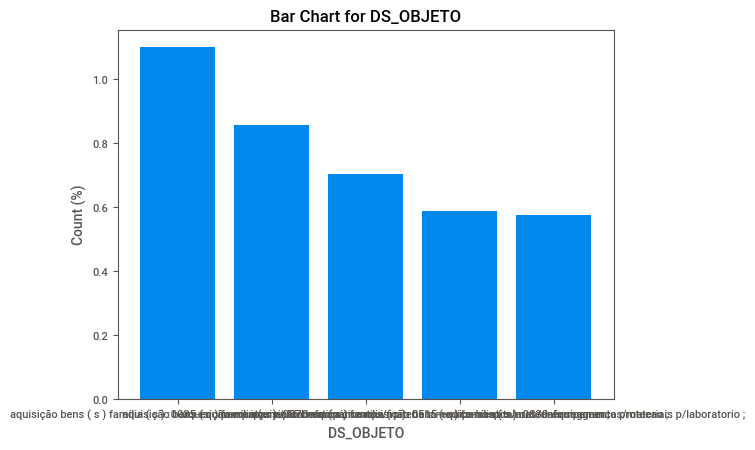

In [48]:
# equipamentos
filtro = licitacoes_compras['DS_OBJETO'].str.contains('equip')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [49]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição bens ( s ) família ( s ) :0035-equipamentos p/informatica ;                                                                                                                                              86
aquisição equipamentos informática                                                                                                                                                                                 67
aquisição bens ( s ) família ( s ) :0870-equipamentos/materiais medico-hospitalares/enfermagem ;                                                                                                                   55
aquisição bens ( s ) família ( s ) :0515-equipamentos/materiais seguranca protecao ;                                                                                                                               46
aquisição bens ( s ) família ( s ) :0830-equipamentos/materiais p/laboratorio ;                                                                 

##### veículos

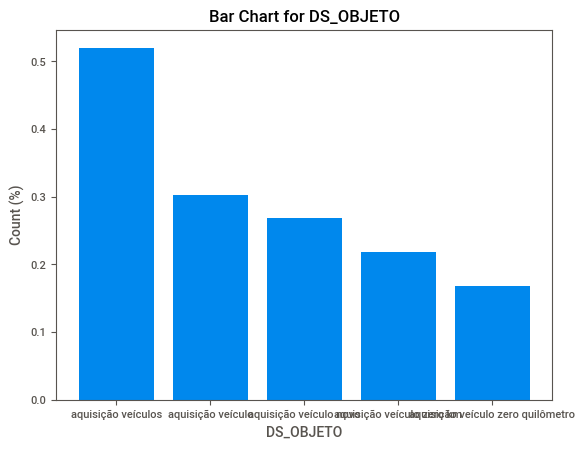

In [50]:
# veículos
filtro = licitacoes_compras['DS_OBJETO'].str.contains('veículo')

plot_bar_chart_for_filtered_df(licitacoes_compras, filtro, 'DS_OBJETO')

In [51]:
# legenda
licitacoes_compras[filtro]['DS_OBJETO'].value_counts()

aquisição veículos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  31
aquisição veículo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   18
aquisição veículo novo    

### Agora, irei analisar o comportamento dos órgãos licitantes em relação ao valor total licitado. Para isso, irei agrupar os órgãos por valor total licitado e plotar um gráfico de barras.

In [52]:
licitacoes_compras['NM_ORGAO'].value_counts()

PM DE GUAPORÉ                                   1801
CENTRAL DE LICITAÇÕES DO ESTADO                 1251
PM DE PELOTAS                                   1128
PM DE PEDRAS ALTAS                              1099
SECRETARIA DA SAÚDE DO RS                       1066
                                                ... 
CM DE CAMPO NOVO                                   1
CM DE ESTRELA                                      1
SECRETARIA DO MEIO AMBIENTE E INFRAESTRUTURA       1
INST. PREV. SERV. PUBL. MUNIC. DE IJUÍ             1
CM DE HERVEIRAS                                    1
Name: NM_ORGAO, Length: 843, dtype: int64

In [53]:
# agrupando os órgãos por valor total licitado
orgaos_e_valores = licitacoes_compras.groupby('NM_ORGAO')['VL_HOMOLOGADO'].sum().sort_values(ascending = False).head(10)

In [54]:
orgaos_e_valores
# top 10 orgãos que mais licitaram durante todo o período apresentado

NM_ORGAO
PM DE VIAMÃO               5.086802e+09
PM DE TAPERA               1.605119e+09
PM DE PORTO ALEGRE         5.724574e+08
PM DE HERVAL               4.797792e+08
PM DE CANGUÇU              3.151533e+08
PM DE CAXIAS DO SUL        1.719213e+08
PM DE ELDORADO DO SUL      1.575752e+08
PM DE SANTA CRUZ DO SUL    1.557504e+08
PM DE ROSÁRIO DO SUL       1.526500e+08
PM DE QUARAÍ               1.053429e+08
Name: VL_HOMOLOGADO, dtype: float64

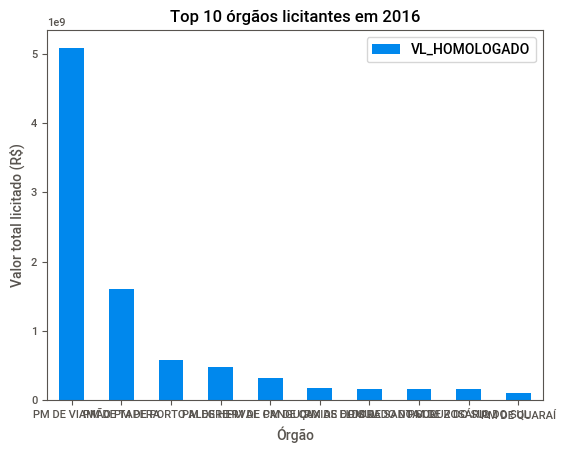

In [55]:
top_10_orgaos = orgaos_e_valores.reset_index()

top_10_orgaos.plot.bar(x='NM_ORGAO', rot=0)

plt.title('Top 10 órgãos licitantes em 2016')
plt.xlabel('Órgão')
plt.ylabel('Valor total licitado (R$)')

plt.show()

In [56]:
# legenda dos valores
orgaos_e_valores.keys()

Index(['PM DE VIAMÃO', 'PM DE TAPERA', 'PM DE PORTO ALEGRE', 'PM DE HERVAL',
       'PM DE CANGUÇU', 'PM DE CAXIAS DO SUL', 'PM DE ELDORADO DO SUL',
       'PM DE SANTA CRUZ DO SUL', 'PM DE ROSÁRIO DO SUL', 'PM DE QUARAÍ'],
      dtype='object', name='NM_ORGAO')

### Agora, irei analisar o comportamento das licitações. Quanto tempo elas tendem a demorar para serem homologadas? Quanto tempo elas tendem a demorar para serem adjudicadas? Quanto tempo elas tendem a demorar para serem abertas? Quanto tempo elas tendem a demorar para serem encerradas?

In [57]:
filter = ~licitacoes_compras['DT_HOMOLOGACAO'].str.contains('Não') & ~licitacoes_compras['DT_ADJUDICACAO'].str.contains('Não')

datetimes_licitacoes = licitacoes_compras[filter][['DT_ABERTURA', 'DT_HOMOLOGACAO', 'DT_ADJUDICACAO']]

In [58]:
datetimes_licitacoes

,DT_ABERTURA,DT_HOMOLOGACAO,DT_ADJUDICACAO
1,2016-01-22,2016-01-29,2016-01-29
2,2016-01-26,2016-02-01,2016-02-01
3,2016-02-02,2016-02-11,2016-02-11
5,2016-02-12,2016-02-15,2016-02-15
6,2016-01-25,2016-01-28,2016-01-28
...,...,...,...
70518,2019-05-22,2019-07-11,2019-07-09
70519,2019-05-21,2019-05-28,2019-05-24
70524,2019-05-02,2019-05-06,2019-05-06
70536,2019-02-08,2019-02-08,2019-02-08


In [59]:
datetimes_licitacoes['DT_ABERTURA'] = pd.to_datetime(datetimes_licitacoes['DT_ABERTURA'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 19-06-05 00:00:00 present at position 1042

#### Me parece que um registro está com a data de abertura em formato errado. Vou verificar.

In [60]:
try:
    datetimes_licitacoes['DT_ABERTURA'] = pd.to_datetime(datetimes_licitacoes['DT_ABERTURA'])
except ValueError:
    # If there is an error, find the row that is causing it
    error_index = datetimes_licitacoes[pd.to_datetime(datetimes_licitacoes['DT_ABERTURA'], errors='coerce').isna()].index
    # Drop the row
    datetimes_licitacoes.drop(error_index, inplace=True)

In [61]:
datetimes_licitacoes['DT_ABERTURA'] = pd.to_datetime(datetimes_licitacoes['DT_ABERTURA'], format='%Y-%m-%d')

In [62]:
datetimes_licitacoes['DT_HOMOLOGACAO'] = pd.to_datetime(datetimes_licitacoes['DT_HOMOLOGACAO'], format='%Y-%m-%d')

In [63]:
datetimes_licitacoes['DT_ADJUDICACAO'] = pd.to_datetime(datetimes_licitacoes['DT_ADJUDICACAO'], format='%Y-%m-%d')

#### Tempo de abertura - homologação

In [64]:
from my_library import calculate_working_days
def calculate_working_days_column(col1, col2):
    return calculate_working_days(col1, col2)

datetimes_licitacoes['tempo_abertura_homologacao'] = datetimes_licitacoes.apply(lambda x: calculate_working_days_column(x['DT_ABERTURA'], x['DT_HOMOLOGACAO']), axis=1)

In [65]:
datetimes_licitacoes['tempo_abertura_homologacao'].describe()

count    57593.000000
mean         9.700710
std         16.891064
min          0.000000
25%          2.000000
50%          5.000000
75%         11.000000
max        556.000000
Name: tempo_abertura_homologacao, dtype: float64

##### É possível observar que existe uma diferença média de 10 dias, porém, o desvio padrão é de 17 dias, o que indica que há uma grande variação nos tempos de homologação. A fim de evitar a influencia de outliers, podemos levantar a hipótese de que os tempos de homologação estejam de acordo com a mediana(50%), que é de 5 dias.

#### Tempo de homologação - adjudicação

In [66]:
datetimes_licitacoes['tempo_homologacao_adjudicacao'] = datetimes_licitacoes.apply(lambda x: calculate_working_days_column(x['DT_HOMOLOGACAO'], x['DT_ADJUDICACAO']), axis=1)

In [67]:
datetimes_licitacoes['tempo_homologacao_adjudicacao'].describe()

count    57593.000000
mean         0.921900
std          3.084405
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        332.000000
Name: tempo_homologacao_adjudicacao, dtype: float64

##### Já o tempo de adjudicação é bem menor, com uma média de 1 dia e um desvio padrão de 3 dias. A mediana é de 1 dia, o que indica que a maioria dos tempos de adjudicação estão de acordo com a mediana.

### Agora, irei analisar as licitações pelas estações do ano. Quais são as estações do ano com mais licitações?

In [68]:
# Aplicando a função de classificação de estação do ano
from my_library import get_season

datetimes_licitacoes['estacao'] = datetimes_licitacoes['DT_ABERTURA'].apply(lambda x: get_season(x))

In [69]:
datetimes_licitacoes['estacao'].value_counts()

Inverno      17665
Outono       16362
Primavera    12949
Verão        10617
Name: estacao, dtype: int64

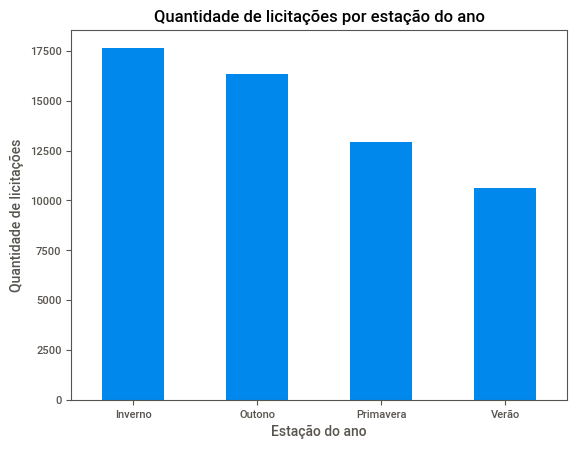

In [70]:
# plotando o gráfico de barras

datetimes_licitacoes['estacao'].value_counts().plot.bar(rot=0)

plt.title('Quantidade de licitações por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Quantidade de licitações')

plt.show()

In [71]:
datetimes_licitacoes['NM_ORGAO'] = licitacoes_compras['NM_ORGAO'].reindex(datetimes_licitacoes.index, method='ffill', duplicates='drop')

TypeError: reindex() got an unexpected keyword argument "duplicates"

Não consegui resolver o problema de indexação, então, vou fazer na tabela original

In [72]:
try:
    licitacoes_compras['estacao'] = licitacoes_compras['DT_ABERTURA'].apply(lambda x: get_season(x))
except ValueError:
    # If there is an error, find the row that is causing it
    error_index = licitacoes_compras[pd.to_datetime(licitacoes_compras['DT_ABERTURA'], errors='coerce').isna()].index
    # Drop the row
    licitacoes_compras.drop(error_index, inplace=True)

In [73]:
licitacoes_compras['estacao'] = licitacoes_compras['DT_ABERTURA'].apply(lambda x: get_season(x))

In [74]:
licitacoes_compras.groupby('estacao')['NM_ORGAO'].value_counts()

estacao  NM_ORGAO                                        
Inverno  PM DE GUAPORÉ                                       516
         SECRETARIA DA SAÚDE DO RS                           374
         PM DE PEDRAS ALTAS                                  331
         FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO             318
         PM DE PELOTAS                                       297
                                                            ... 
Verão    PM DE SÃO LEOPOLDO                                    1
         PM DE TAQUARUÇU DO SUL                                1
         PM DE TRÊS ARROIOS                                    1
         SECRETARIA DA FAZENDA DO RS                           1
         SISTEMA DE PREVIDÊNCIA MUNICIPAL - S. LIVRAMENTO      1
Name: NM_ORGAO, Length: 2793, dtype: int64

### Agora, irei analisar os itens licitados. Quais são os itens mais licitados? Quais são os itens mais caros? Quais são os itens mais baratos?

In [75]:
itens['DS_ITEM'].value_counts()

MANGUEIRA SILICONE 2.1/2"                                                                                                     477
MATERIAL                                                                                                                      455
SERVIÇO                                                                                                                       293
.                                                                                                                             216
CENOURA                                                                                                                       163
                                                                                                                             ... 
Fechadura externa 40mm.                                                                                                         1
Óleo de soja refinado, sem amassados, vazamentos e ferrugem e que contenham data de fabric

Por meio do resultado anterior é possível determinar algumas estratégias para a exploração de dados sobre os itens licitados.
Como por exemplo:
- Descrições que possuam a string 'mg'/'miligramas' ou 'ml'/'mililitros' podem ser relacionadas com medicamentos
- Mililitros podem ser confundidos como alimentos, itens de higiene e limpeza, etc
- Descrições que possuam unidades de medida como m², m³, etc podem ser relacionadas com materiais de construção
- Descrições que possuam a string 'kg'/'quilogramas' podem ser relacionadas com alimentos

In [76]:
itens[itens['DS_ITEM'].str.contains('mg', case = False)]['DS_ITEM'].value_counts()

OMEPRAZOL 20MG                                               50
LORATADINA 10MG                                              48
FENOBARBITAL 100MG                                           41
FUROSEMIDA 40MG                                              40
CEFALEXINA 500MG                                             39
                                                             ..
Sacarato de hidróxido férrico 100mg/5mL,solução injetável     1
nortriptilina cloridrato de 75mg capsula                      1
TIZANIDINA 2MG                                                1
Lovastatina 20 mg                                             1
AMOXICILINA PO P/ SUSP. ORAL 50MG/ML 60 ML                    1
Name: DS_ITEM, Length: 25795, dtype: int64

In [77]:
itens[itens['DS_ITEM'].str.contains('ml', case = False)]['DS_ITEM'].value_counts()

Adesivo fotopolimerizável primer e adesivo em um só frasco. Solvente à base de água e álcool. Contém partícula de carga de 5nm.tampa flip top.rendimento: até 280 restaurações. Referência: 3m single bond. Frasco com 6ml. Com prazo de validade de no mínimo 2 anos.    57
OLEO DE SOJA 900 ML                                                                                                                                                                                                                                                       20
ÓLEO DE SOJA 900 ML                                                                                                                                                                                                                                                       13
OLEO DE SOJA 900ML                                                                                                                                                                               

In [78]:
itens[itens['DS_ITEM'].str.contains('m²', case = False)]['DS_ITEM'].value_counts()

Lote - área de 1,50x3,00m. Totalizando 4,50m². A área do imóvel será exclusivamente para uso de túmulos, capelas ou jazigos.                                                                                                                                                                                                               19
CABO DE COBRE FLEXÍVEL ISOLADO, 2,5 MM², ANTI-CHAMA 450/750 V, PARA CIRCUITOS TERMINAIS - FORNECIMENTO E INSTALAÇÃO. AF_12/2015                                                                                                                                                                                                            13
Papel oficio A4 - Cor Branco- gr 75 g/m²,embalagem  c/ 500 unid.                                                                                                                                                                                                                                                                           1

In [79]:
itens[itens['DS_ITEM'].str.contains('m³', case = False)]['DS_ITEM'].value_counts()

contratação de 01 (um) veículo tipo caminhão toco com cabine dupla ou suplementar, caçamba basculante, igual ou superior a 12.000 kg,  macaco hidráulico igual ou superior a 6.000 kg, carga igual ou superior a 7m³, 6 lugares no mínimo, 2014 ou superior                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [80]:
itens[itens['DS_ITEM'].str.contains('kg', case = False)]['DS_ITEM'].value_counts()

TOMATE - KG                                                                                                                                                                                                                                                                                 17
AMIDO DE MILHO 1 KG                                                                                                                                                                                                                                                                         14
FARINHA DE TRIGO ESPECIAL, EMBALAGEM DE 5KG                                                                                                                                                                                                                                                 13
FARINHA DE MILHO 1 KG                                                                                                                      

In [81]:
itens[itens['DS_ITEM'].str.contains('gramas', case = False)]['DS_ITEM'].value_counts()

PLACA DE SINALIZACAO DE SEGURANCA CONTRA INCENDIO, FOTOLUMINESCENTE, RETANGULAR, *13 X 26* CM, EM PVC *2* MM ANTI-CHAMAS (SIMBOLOS, CORES E PICTOGRAMAS CONFORME NBR 13434)                                                                                                                                                                                                                                                                                                                                                                                                                            6
PLACA DE SINALIZACAO DE SEGURANCA CONTRA INCENDIO, FOTOLUMINESCENTE, RETANGULAR, *20 X 40* CM, EM PVC *2* MM ANTI-CHAMAS (SIMBOLOS, CORES E PICTOGRAMAS CONFORME NBR 13434)                                                                                                                                                                                                                                                    

### Devido a enormosidade dos dados, irei aplicar uma função para calcular o tamanho de uma amostra de acordo com o tamanho da população e o erro máximo aceitável. Assim, será possível analisar os itens mais licitados, os mais caros e os mais baratos e suas respectivas frequências de forma mais eficiente.

#### Eu tentei aplicar a fórmula a seguir, cujo resultado retorna o tamanho da amostra para ser usada. Não deu muito certo com o problema proposto, mas segue a descrição:

$ n = \frac{(Z_{\alpha/2})^2 \cdot p \cdot (1 - p)}{E^2} $

- n é o tamanho da amostra
- Z_{\alpha/2} é o valor crítico de uma distribuição normal padrão para um nível de significância especificado (por exemplo, \alpha = 0,05)
- p é a proporção estimada da população que pertence à categoria de interesse
- E é o erro desejado da margem

A fórmula é usada para garantir que a amostra seja grande o suficiente para representar a população com uma margem de erro aceitável. Ao aumentar o tamanho da amostra, a margem de erro diminui. Ao contrário, ao diminuir o tamanho da amostra, a margem de erro aumenta.

In [82]:
from my_library import sample_df
# Como eu não sei a variabilidade, irei considerar buscar uma amostra entre 10% e 20% da população. Assim, conseguirei uma amostra de tamanho razoável.

itens_sample = sample_df(itens_2016, 0.15)

In [83]:
itens_sample['DS_ITEM'].value_counts()

MANGUEIRA SILICONE 2.1/2"                                                                                                                           226
MATERIAL                                                                                                                                            122
LIVRO                                                                                                                                                59
.                                                                                                                                                    49
NÃO CADASTRADO                                                                                                                                       36
                                                                                                                                                   ... 
SERVIÇOS DE NUTRICIONISTA                                                               

#### Assim como nas licitações, é possível tratar os texto dos itens para extrair informações relevantes. Por exemplo, podemos extrair informações sobre a categoria do item, como alimentos, medicamentos, materiais de construção, etc. utilizando o pipeline e a função de classificação de texto desenvolvidos anteriormente.

In [84]:
from my_library import preprocess_text_pipeline

itens_sample['DS_ITEM'] = itens_sample['DS_ITEM'].apply(lambda x: preprocess_text_pipeline(x))

In [85]:
from my_library import get_most_common_nouns

itens_and_counts = get_most_common_nouns(itens_sample, 'DS_ITEM', 100)

In [86]:
itens_and_counts

[('cor', 3193),
 ('%', 2663),
 ('cm', 2565),
 ('tipo', 2172),
 ('x', 2050),
 ('mm', 1977),
 ('embalagem', 1774),
 ('mg', 1735),
 ('unidades', 1699),
 ('data', 1696),
 ('kg', 1586),
 ('ml', 1481),
 ('tamanho', 1453),
 ('c/', 1416),
 ('papel', 1375),
 ('aço', 1317),
 ('pvc', 1317),
 ('caixa', 1310),
 ('meses', 1294),
 ('produto', 1265),
 ('qualidade', 1254),
 ('validade', 1169),
 ('litros', 1148),
 ('conforme', 1141),
 ('concreto', 1100),
 ('material', 1076),
 ('branco', 1052),
 ('mínimo', 1013),
 ('branca', 998),
 ('base', 979),
 ('plástico', 975),
 ('m', 964),
 ('g', 963),
 ('cabo', 962),
 ('–', 954),
 ('serviços', 898),
 ('ano', 887),
 ('pó', 871),
 ('pneu', 869),
 ('médio', 869),
 ('tubo', 853),
 ('preto', 824),
 ('serviço', 803),
 ('verde', 774),
 ('cada', 766),
 ('fabricação', 763),
 ('azul', 741),
 ('madeira', 734),
 ('instalação', 732),
 ('placa', 728),
 ('pintura', 699),
 ('sistema', 694),
 ('p/', 691),
 ('tinta', 689),
 ('peso', 683),
 ('transparente', 680),
 ('altura', 676),
 

#### Ao examinar o resultado obtido e descartar palavras como unidades de medida, ou símbolos especiais, é possível averiguar que a maioria dos itens está distribuído em material escolar  e materiais de construção. Também estão descritos materiais como um geral.

#### Sendo assim, irei novamente elencar os itens mais presentes e assim fazer uma relação com os órgãos, além de comparar diferenças no valor unitário e o homologado.
Palavras elencadas:
- caixa
- papel
- pvc
- aço
- concreto

##### Mas antes de prosseguir, irei verificar a quantidade de itens licitados por órgão e o valor médio unitário homologado.

In [87]:
itens_sample.reset_index(drop=True, inplace=True)

In [88]:
itens_sample = pd.merge(itens_sample, licitacoes[['CD_ORGAO','NM_ORGAO']], on='CD_ORGAO')

In [97]:
itens_sample.groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE GRAVATAÍ                 2.604419e+10
PM DE CANOAS                   1.993866e+10
PM DE NOVO HAMBURGO            1.798581e+10
PM DE CAXIAS DO SUL            1.350603e+10
PM DE PELOTAS                  1.254118e+10
                                   ...     
CM DE SÃO VALÉRIO DO SUL       5.000000e+00
CM DE PORTO VERA CRUZ          4.000000e+00
CM DE BARRA FUNDA              4.000000e+00
CM DE PARECI NOVO              2.000000e+00
CONS. REGIONAL DO PARANHANA    1.000000e+00
Name: QT_ITENS, Length: 667, dtype: float64

In [91]:
itens_sample.groupby('NM_ORGAO')['VL_UNITARIO_HOMOLOGADO'].mean().sort_values(ascending=False)

NM_ORGAO
PM DE PALMEIRA DAS MISSÕES                          565758.937048
DEP. MUNICIPAL DE LIMPEZA URBANA - PORTO ALEGRE     540274.270000
PM DE CANOAS                                        524406.553887
PM DE ALEGRETE                                      208534.500000
PM DE SÃO BORJA                                     138779.756667
                                                        ...      
PM DE SALTO DO JACUÍ                                          NaN
PM DE SÃO LEOPOLDO                                            NaN
PREV-XANGRI-LÁ                                                NaN
SERVIÇO MUN. DE ÁGUA E ESGOTOS - S. LEOPOLDO                  NaN
SISTEMA DE PREVIDÊNCIA MUNICIPAL - S. LIVRAMENTO              NaN
Name: VL_UNITARIO_HOMOLOGADO, Length: 667, dtype: float64

In [92]:
itens_sample['VL_DIFF'] = itens_sample['VL_UNITARIO_HOMOLOGADO'] - itens_sample['VL_UNITARIO_HOMOLOGADO']

In [98]:
itens_sample.groupby('NM_ORGAO')['VL_DIFF'].sum().sort_values()

NM_ORGAO
ADM. DE  CONSÓRCIOS  INTERMUNIC. S/A. - CAXIAS DO SUL    0.0
PM DE NOVA ALVORADA                                      0.0
PM DE NOVA ARAÇÁ                                         0.0
PM DE NOVA BASSANO                                       0.0
PM DE NOVA BOA VISTA                                     0.0
                                                        ... 
PM DE BOA VISTA DO INCRA                                 0.0
PM DE BOA VISTA DO SUL                                   0.0
PM DE BOM PRINCÍPIO                                      0.0
PM DE BOM RETIRO DO SUL                                  0.0
TRIBUNAL DE JUSTIÇA                                      0.0
Name: VL_DIFF, Length: 667, dtype: float64

#### Agora, irei analisar os itens licitados baseados nas palavras elencadas.

In [94]:
itens_sample['DS_ITEM'].value_counts()

mangueira silicone 2.1/2 ''                                                                                                                                                                                                                                                                                                           191422
material                                                                                                                                                                                                                                                                                                                               53070
cfe edital                                                                                                                                                                                                                                                                                                                             36504
l

In [99]:
itens_sample[itens_sample['DS_ITEM'].str.contains('caixa', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                   477885525.0
PM DE CAXIAS DO SUL            229870040.0
PM DE NOVA BASSANO             217307008.0
PM DE TRAMANDAÍ                109873200.0
PM DE ERECHIM                   61751938.0
                                  ...     
CM DE PELOTAS                         60.0
CM DE SÃO JOSÉ DO NORTE               21.0
CM DE PINHAL                          16.0
CM DE SÃO MARTINHO DA SERRA           11.0
CM DE CERRO GRANDE DO SUL              3.0
Name: QT_ITENS, Length: 372, dtype: float64

In [100]:
itens_sample[itens_sample['DS_ITEM'].str.contains('papel', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                              2.395856e+09
PM DE CAXIAS DO SUL                       1.286949e+09
PM DE ELDORADO DO SUL                     1.896878e+08
PM DE TRAMANDAÍ                           1.453630e+08
PM DE TAPEJARA                            9.325800e+07
                                              ...     
PM DE IBIRAPUITÃ                          1.790000e+02
PM DE VICENTE DUTRA                       1.760000e+02
CM DE GLORINHA                            1.230000e+02
HOSP. MUNICIPAL SÃO JOSÉ DE IBIRAIARAS    9.600000e+01
CM DE AJURICABA                           4.200000e+01
Name: QT_ITENS, Length: 331, dtype: float64

In [101]:
itens_sample[itens_sample['DS_ITEM'].str.contains('pvc', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE SANTA CRUZ DO SUL             200502645.0
PM DE CANOAS                         44665179.0
PM DE SÃO FRANCISCO DE PAULA         31182850.0
PM DE CAXIAS DO SUL                  27315364.0
CIA. DE DESENV. DE CAXIAS DO SUL     24760890.0
                                       ...     
PM DE ARROIO DO MEIO                      285.0
PM DE PAULO BENTO                         278.0
PM DE CENTENÁRIO                          242.0
PM DE CARAÁ                               211.0
PM DE VILA LÂNGARO                        151.0
Name: QT_ITENS, Length: 256, dtype: float64

In [102]:
itens_sample[itens_sample['DS_ITEM'].str.contains('aço', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE SANTA MARIA            4.328498e+08
PM DE CAXIAS DO SUL          2.713949e+08
PM DE CAPÃO DA CANOA         6.369841e+07
PM DE URUGUAIANA             3.696091e+07
PM DE PELOTAS                3.521520e+07
                                 ...     
CM DE ILÓPOLIS               2.200000e+01
CM DE GETÚLIO VARGAS         2.000000e+01
CM DE TRÊS CACHOEIRAS        1.800000e+01
CM DE JARI                   1.300000e+01
CM DE CERRO GRANDE DO SUL    6.000000e+00
Name: QT_ITENS, Length: 394, dtype: float64

In [103]:
itens_sample[itens_sample['DS_ITEM'].str.contains('concreto', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                        7.591912e+07
PM DE COTIPORÃ                      3.526944e+07
PM DE PELOTAS                       1.766661e+07
TRIBUNAL DE JUSTIÇA                 1.689875e+07
CIA. DE DESENV. DE CAXIAS DO SUL    1.617116e+07
                                        ...     
PM DE SÉRIO                         1.824000e+02
PM DE RONDA ALTA                    1.620000e+02
PM DE BENJAMIN CONSTANT DO SUL      1.430000e+02
PM DE SEVERIANO DE ALMEIDA          1.400000e+02
PM DE FAZENDA VILANOVA              0.000000e+00
Name: QT_ITENS, Length: 242, dtype: float64

E, por fim, irei analisar os lotes licitados.

In [104]:
from my_library import preprocess_text_pipeline

lotes = pd.concat([lotes_2016, lotes_2017, lotes_2018, lotes_2019])

In [105]:
lotes['DS_LOTE'] = lotes['DS_LOTE'].apply(lambda x: preprocess_text_pipeline(x))

In [ ]:
from my_library import get_most_common_nouns

lotes_and_counts = get_most_common_nouns(lotes, 'DS_LOTE', 100)

### A análise por texto não foi muito efetiva, então procurarei saber qual tipo de modalidade predomina entre os órgãos.

In [ ]:
lotes = pd.merge(lotes, licitacoes[['CD_ORGAO','NM_ORGAO']], on='CD_ORGAO')

In [ ]:
lotes.groupby('NM_ORGAO')['DS_MODALIDADE'].value_counts()

# Conclusões da Análise Exploratória de Dados (EDA)

A EDA foi realizada com o objetivo de compreender a estrutura e as características dos dados. Aqui estão algumas das principais conclusões:

## Distribuição de Variáveis

- A distribuição dos valores licitados mostra que a maioria dos dados está concentrada em um determinado tipo de órgão - Policias Militares e que no inverno ocorreram muito mais pedidos de licitações


## Correlação entre Variáveis

- A partir dos reports gerados, ao clicar em "associations" é possível verificar a correlação entre variáveis categóricas e numéricas. As mais diretas são as que se relacionam por meio de algum cálculo ou que referenciam a coisas parecidas, como valor licitado e homologado.

## Valores Ausentes

- VL_HOMOLOGADO apresentou uma quantidade significativa de valores ausentes, o que afetou a precisão das análises em primeiro momento. É importante decidir como lidar com esses valores ausentes a fim de ter um ótimo processamento de texto.
- Além disso, a coluna NR_DOCUMENTO apresenta valores categóricos por serem CPFs, mas na leitura os dados apareceram como numéricos. É importante verificar se é possível transformar esses dados em categóricos.

## Conclusão

Em geral, a EDA forneceu uma visão geral do conjunto de dados e destacou algumas questões que precisam ser abordadas antes de continuar com as análises. A EDA também ajudou a identificar as variáveis que precisam ser exploradas mais a fundo em análises futuras. Além disso, no decorrer da exploração foi possível identificar padrões como grande quantidade de licitações em determinados órgãos e em determinadas épocas do ano, como também a variedade de itens licitados e a grande quantidade de lotes licitados em uma determinada modalidade.
